In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#|default_exp draw.pil_drawer

# PIL Drawer

> API details.

In [ ]:
#|export
from fastcore.all import *
import polvo as pv
import polvo.bbox as pb

/home/lgvaz/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#|export
class Visitor:
    # separating the drawing functions from its call allows us to pass custom arguments to each item
    def collect_accept_fns(self, record):
        return [item.accept_visit(self) for item in record]
    
    def execute_accept_fns(self, fns, kwargs_list=None):
        kwargs_list = kwargs_list or [{} for _ in fns]
        for fn, kwargs in zip(fns, kwargs_list): fn(**kwargs)
        
    def visit_all(self, record, kwargs_list=None):
        fns = self.collect_accept_fns(record)
        return self.execute_accept_fns(fns, kwargs_list=kwargs_list)
    
    def visit_image_file(self, image_file, **kwargs): return partial(self._visit_image_file, image_file, **kwargs)
    def visit_bbox(self, bbox, **kwargs): return partial(self._visit_bbox, bbox, **kwargs)
    def visit_bbox_labelled(self, bbox, **kwargs): return partial(self._visit_bbox_labelled, bbox, **kwargs)

In [ ]:
#|export
class PILDrawer(Visitor):
    def draw(self, record, image=None, kwargs_list=None):
        self._image = image
        self.visit_all(record, kwargs_list=kwargs_list)
        return self._image
    
    def _visit_image_file(self, image_file, **kwargs): self._image = image_file.open(**kwargs)
    def _visit_bbox(self, bbox, **kwargs): self._image = pb.overlay(bbox=bbox, image=self._image, **kwargs)
    def _visit_bbox_labelled(self, bbox, **kwargs): self._image = pb.overlay_bbox_labelled(bbox=bbox, image=self._image, **kwargs)

In [ ]:
records = [pv.ImageFile(str(pv.test.SEG_IMAGE)),
           pb.BBox.from_xyxy(20, 20, 64, 280),
           pb.BBoxLabeled(pb.BBox.from_xywh(10, 72, 478, 72), 'test'),
           pb.BBox.from_relative_xcycwh(.4, .4, .7, .6, 512, 300),
           pb.OBBox.from_clockwise(256,175, 100,140, 80),
           pb.BBoxLabeled(pb.OBBox.from_clockwise(124,58, 50,78, 42), 'rotated')]

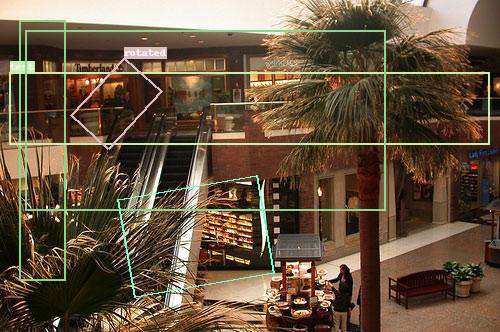

In [ ]:
drawer = PILDrawer()
drawer.draw(records)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()